# Projet : analyse de data

### L'économie française peut-elle survivre sans le tourisme ?

Quentin BONNET

Nathan BOUTHORS

Eliott FAYOLLE

Baptiste MICHAUD

Yvon PEREZ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('stats_tourisme.csv')
df.head()

,Pays,Dépense étrangère dans le pays pour le tourisme ($US2021),Dépense internationale pour les voyages à l'étranger ($US2021),Hôtes locaux (hôtels),Hôtes étrangers (hôtels),Nombre moyen de nuits passées par les touristes étrangers,Nombre de voyages des habitants dans un autre endroit du pays par an,Nombre de passagers aériens,Touristes annuels,Nombre d'employés dans le tourisme pour 1000 habitants,Nombre de départs à l'étranger par an pour 1000 habitants,Nombre d'employés dans la restauration pour 1000 habitants,Nombre de voyages d'une seule journée depuis l'étranger pour 1000 habitants,PIB / habitant,Population
0,Albania,5.166606e+09,1876012300,430000.0,736000.0,3.0,NaN,307741.0,6128000.0,18.0,NaN,NaN,96.4,13653,2402113
1,Algeria,NaN,676212350,3719000.0,NaN,2.0,NaN,6752002.0,NaN,7.4,132.4,NaN,NaN,11627,46700000
2,Argentina,NaN,8320167400,16289000.0,NaN,2.0,1.0,19461376.0,7400000.0,28.0,202.7,11.3,NaN,22072,47067441
3,Australia,4.483945e+10,36791038000,40088000.0,4515000.0,NaN,4.6,76850600.0,NaN,27.5,NaN,10.6,NaN,49421,27122411
4,Austria,2.853797e+10,12283111000,11144000.0,22662000.0,3.0,1.5,46476600.0,31884000.0,23.2,1340.2,NaN,NaN,5577,9179693


Notre étude se base sur les données récupérées sur la page https://ourworldindata.org/tourism.
Nous nous intéressons à la place du tourisme dans l'économie et la culture de 59 pays des 5 continents. Nous avons privilégié les pays les plus peuplés qui comptaient suffisamment de données disponibles.

La liste des pays :

In [3]:
df['Pays']

0            Albania
1            Algeria
2          Argentina
3          Australia
4            Austria
5            Belgium
6             Brazil
7           Bulgaria
8           Cameroon
9             Canada
10         CapeVerde
11             Chile
12             China
13          Colombia
14           Croatia
15            Cyprus
16           Czechia
17           Denmark
18             Egypt
19           Estonia
20           Finland
21            France
22           Georgia
23           Germany
24            Greece
25           Hungary
26           Iceland
27             India
28         Indonesia
29           Ireland
30            Israel
31             Italy
32             Japan
33            Latvia
34        Luxembourg
35             Malta
36            Mexico
37           Morocco
38       Netherlands
39    NorthMacedonia
40            Norway
41              Peru
42       Philippines
43            Poland
44          Portugal
45           Romania
46            Russia
47       Saud

### L'importance du tourisme pour les différents pays du monde

On va regarder si tous les pays ont des caractéristiques similaires vis-à-vis du tourisme.

On trace pour chaque pays le nombre de touristes qui sont venus au cours de l'année 2019 en fonction du nombre d'habitants du pays. L'axe des abscisses (correspondant à la population) est en échelle logarithmique pour améliorer la visibilité.

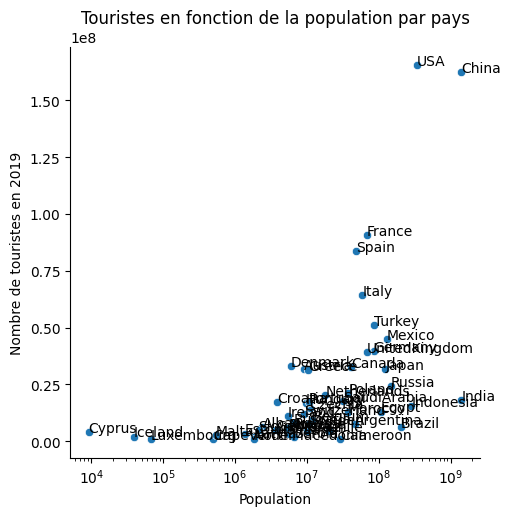

In [4]:
pays_par_touristes = df.loc[df['Touristes annuels'].notna(), ['Pays', 'Touristes annuels', 'Population']]

graphique = sns.relplot(data = pays_par_touristes, x = 'Population', y = 'Touristes annuels', kind = 'scatter')
graphique.set(xscale="log", xlabel = "Population", ylabel = "Nombre de touristes en 2019", title = "Touristes en fonction de la population par pays")

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(pays_par_touristes['Population'],pays_par_touristes['Touristes annuels'], pays_par_touristes['Pays'], plt.gca())


On constate que tous les pays ne se valent pas : notamment la France, l'Espagne, l'Italie et les Etats-Unis accueillent beaucoup d'étrangers par rapport à leur nombre d'habitants. Il semblerait donc que le tourisme soit un domaine important pour ces pays.

### Importance économique du tourisme

Comparaison des sommes investies, du nombre d'employés

### Des différences culturelles ?

Comparaison des déplacements à l'étranger par rapport aux déplacements internes au pays (ainsi que les séjours dans les hôtels)